In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
movie_reviews = pd.read_csv('/content/gdrive/My Drive/IMDB Dataset.csv')

In [ ]:
print(movie_reviews.loc[57])

review       I laughed all the way through this rotten movi...
sentiment                                             negative
Name: 57, dtype: object


In [ ]:
movie_reviews.isnull().values.any()


False

In [ ]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


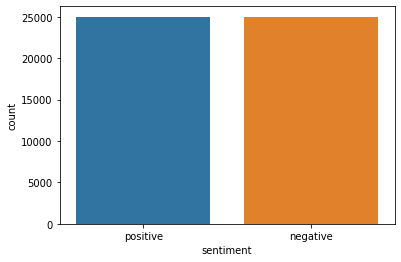

In [ ]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
%tensorflow_version 1.x
from numpy import array
import keras.backend as KB
import keras.layers as KL
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Bidirectional
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input, LSTM

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
print(X_train[1])

Wow here it finally is the action movie without action In real low budget setting don miss the hilarious flying saucers flying by few times of future Seattle we find no brain hardbody seeking to avenge her childhood There is nothing even remotely original or interesting about the plot and the actors performance is only rivalled in stupidity by the attempts to steal from other movies mainly Matrix without having the money to do it right Yes we do get to see some running on walls and slow motion shoot outs secs approx but these scenes are about as cool as the stupid hardbody attempts at making jokes about male incompetence now and then And yes we are also served number of leads that lead absolutely nowhere as if the script was thought out by the previously unseen cast while shooting the scenes Believe me it is as bad as it possibly can get In fact it doesn deserve to be taken seriously but perhaps can make some of you not rent it and save your money 


In [ ]:
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[0])

[5, 416, 18, 1, 111, 2993, 662, 29, 483, 59, 187, 3337, 669, 1373, 1241, 98, 2, 2782, 66, 726, 4, 130, 15, 1, 167, 272, 13, 1, 16, 126, 1, 106, 4800, 5, 70, 8, 579, 3974, 769, 1703, 878, 81, 3518, 2994, 22, 462, 79, 1, 1724, 1826, 18, 2794, 13, 2428, 3, 7780, 1014, 189, 2, 986, 189, 4, 5137, 11, 930, 36, 5, 6, 2606, 49, 2951, 5, 422, 14, 22, 462, 2, 1, 704, 22, 536, 7, 1091, 2313, 1138, 3727, 2, 1239, 3359, 5, 1363, 96, 89, 18, 38, 2794, 50, 5, 4396, 29, 7544, 2, 169, 3704, 98, 574, 3137, 14, 674, 5964, 4801, 5048, 2, 127, 6286, 1161, 531, 251, 13, 701, 1639, 96, 44, 5365, 2861, 33, 2241, 4, 885, 2, 44, 1826, 28, 27, 1894, 9, 386, 43, 67, 84, 181, 520, 39, 4, 25, 1, 2428, 3, 260, 6549, 1, 152, 7, 8, 12, 65, 19, 995, 4801, 5048, 1374, 34, 1151, 259, 26, 1, 125, 3137, 5, 2713, 5, 6, 52, 573, 21, 413, 18, 4, 317, 7, 229, 103, 2, 2313, 5, 161, 297, 97, 46, 6716, 130, 1, 57, 995, 152, 7, 8, 16, 63, 47, 397, 581, 878, 81, 3518, 2, 1639, 30, 208, 720, 274, 250, 537, 7911, 13, 113, 29, 1355, 1

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/gdrive/My Drive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
len(embeddings_dictionary)

400000

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=True)
model.add(embedding_layer)
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 100)          7603100   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               160800    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 7,764,101
Trainable params: 7,764,101
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 490s 24ms/step - loss: 0.6395 - acc: 0.6306 - val_loss: 0.5534 - val_acc: 0.7304
Epoch 2/6
20000/20000 [==============================] - 485s 24ms/step - loss: 0.5579 - acc: 0.7285 - val_loss: 0.5627 - val_acc: 0.7156
Epoch 3/6
20000/20000 [==============================] - 490s 24ms/step - loss: 0.5779 - acc: 0.7199 - val_loss: 0.5967 - val_acc: 0.7158
Epoch 4/6
20000/20000 [==============================] - 494s 25ms/step - loss: 0.4920 - acc: 0.7794 - val_loss: 0.4488 - val_acc: 0.8082
Epoch 5/6
20000/20000 [==============================] - 495s 25ms/step - loss: 0.4324 - acc: 0.8146 - val_loss: 0.4154 - val_acc: 0.8200
Epoch 6/6
25000/25000 [==============================] - 145s 6ms/step


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
instance = X[4]
print(instance)

In [ ]:
instance = tokenizer.texts_to_sequences(instance)
print(instance)
flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

In [ ]:
movie_reviews.loc[4]

In [ ]:
1